In [1]:
from IPython.core.display import HTML
HTML('<style>em { color: red; }</style> <style>.container {width:100% !important; }</style>')

In [2]:
#Lint
def abs_value(n_list):
    n_list = n_list[:] # copy it
    for i in range(len(n_list)):
        if n_list[i] < 0:
            n_list[i] = -n_list[i]
    return n_list

abs_value([-1, -3, 5, -4, 8])

[1, 3, 5, 4, 8]

In [3]:
#Timing
import time
t1 = time.time()
# some code we want to measure
t2 = time.time()
t2 - t1

3.504753112792969e-05

In [4]:
#Measuring Addition
t1 = time.time()

total = 0
limit = 100 # try changing this
for i in range(limit):
    total += i

t2 = time.time()

print("TOTAL:", total)
milliseconds = (t2-t1) * 1000
print("ms:", milliseconds)

TOTAL: 4950
ms: 0.3409385681152344


In [5]:
#Measuring Web Requests and File Usage
import requests
t1 = time.time()

r = requests.get("https://raw.githubusercontent.com/msyamkumar/cs220-projects/master/spring20/lab-p10a/hello.txt")
r.raise_for_status()
data = r.text

t2 = time.time()

milliseconds = (t2-t1) * 1000
print("ms:", milliseconds)

ms: 175.54187774658203


In [6]:
t1 = time.time()

f = open("hello.txt", "w", encoding="utf-8")
f.write(data)
f.close()

t2 = time.time()

milliseconds = (t2-t1) * 1000
print("ms:", milliseconds)

ms: 2.192258834838867


In [7]:
t1 = time.time()

f = open("hello.txt", encoding="utf-8")
data = f.read()
f.close()

t2 = time.time()

milliseconds = (t2-t1) * 1000
print("ms:", milliseconds)

ms: 6.404876708984375


In [8]:
#Implementing Caching
import os 

def download(filename, url):
    # We do not download again if the file already exists
    if os.path.exists(filename):
        return (str(filename) + " already exists!")
    resp = requests.get(url)
    resp.raise_for_status()
    f = open(filename, "w")
    f.write(resp.text)
    f.close()
    # TODO: Write the code to download the file from URL
    # and save it in `filename`

    return (str(filename) + " created!")

download("hello.html", "https://raw.githubusercontent.com/msyamkumar/cs220-projects/master/spring20/lab-p10a/hello.html")

'hello.html already exists!'

In [9]:
#Creating DataFrames
import pandas as pd
from pandas import DataFrame, Series

In [10]:
# option 1
DataFrame([[1,2], [3,4]])

,0,1
0,1,2
1,3,4


In [11]:
# option 2
## regardless of whether the dicts are the inner or outer structures, the dict keys will 
## translate to DataFrame column names
DataFrame([{"x":1, "y":2},
           {"x":3, "y":4}])

,x,y
0,1,2
1,3,4


In [12]:
# option 3
DataFrame({"x":[1,3],
           "y":[2,4]})

,x,y
0,1,2
1,3,4


In [13]:
# option 4
## dict of dicts: keys of the outer dict will be the columns of the DataFrame, and the keys 
## of the inner dicts will be the index of the DataFrame
DataFrame({"x":{"A":1,"B":3},
           "y":{"A":2,"B":4}})

,x,y
A,1,2
B,3,4


In [14]:
# Lab 10b: Fit Lines

In [15]:
# Drawing a Fit
import random

ages = []
heights = []
for i in range(1, 100):
    age = random.uniform(1, 10)
    noise = random.uniform(-1.5, 1.5)
    height = age * 2.3 + noise
    ages.append(age)
    heights.append(height)

trees = DataFrame({"age":ages, "height":heights})
trees.head()

,age,height
0,5.925903,13.660833
1,5.386635,11.073534
2,3.282236,6.699775
3,8.903419,20.289901
4,1.091462,2.242725


Text(0, 0.5, 'Height (feet)')

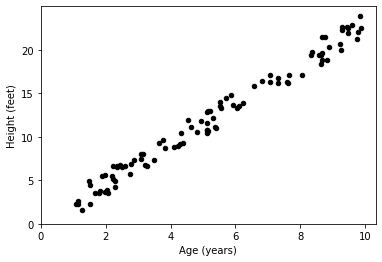

In [16]:
# tree scatter
import matplotlib
matplotlib.rcParams["font.size"] = 12

ax = trees.plot.scatter(x="age", y="height", c="black", xlim=0, ylim=0)
ax.set_xlabel("Age (years)")
ax.set_ylabel("Height (feet)")

In [17]:
trees["height-fitted"] = trees["age"] * 2
trees.head()

,age,height,height-fitted
0,5.925903,13.660833,11.851806
1,5.386635,11.073534,10.773271
2,3.282236,6.699775,6.564471
3,8.903419,20.289901,17.806838
4,1.091462,2.242725,2.182924


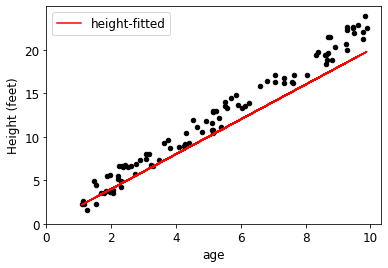

In [18]:
# tree scatter
import matplotlib
matplotlib.rcParams["font.size"] = 12

ax = trees.plot.scatter(x="age", y="height", c="black", xlim=0, ylim=0)
ax.set_xlabel("age")
ax.set_ylabel("Height (feet)")

trees.plot.line(ax=ax, x="age", y="height-fitted", color="red")

In [19]:
# Numpy: most popular way to represent matrices in Python and do linear algebra
import numpy as np

# main data structure in numpy is the array; it is used to represent vectors and matrices
np.array([1,2,3,4,5,6,7,8])

matrix = np.array([1,2,3,4,5,6,7,8]).reshape(2, 4)
matrix

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [20]:
matrix = np.array([1,2,3,4,5,6,7,8]).reshape(4, 2)
matrix

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [21]:
matrix[3][0]

7

In [22]:
matrix[2][1]

6

In [25]:
# convert a Pandas DataFrame to a numpy array, using the .values attribute
trees.values

array([[ 5.9259029 , 13.66083285, 11.85180579],
       [ 5.38663525, 11.07353399, 10.77327051],
       [ 3.28223562,  6.69977506,  6.56447123],
       [ 8.90341886, 20.28990138, 17.80683771],
       [ 1.09146207,  2.24272462,  2.18292414],
       [ 4.81979065, 10.57045384,  9.6395813 ],
       [ 5.56860391, 13.3617517 , 11.13720782],
       [ 3.15700594,  8.05288739,  6.31401187],
       [ 1.15729165,  2.31246126,  2.31458329],
       [ 1.13323432,  2.63065647,  2.26646864],
       [ 8.37259055, 19.78312883, 16.7451811 ],
       [ 8.75413087, 21.47152115, 17.50826173],
       [ 2.76544935,  6.84163859,  5.5308987 ],
       [ 4.64176708, 11.10229002,  9.28353415],
       [ 4.09578649,  8.84829372,  8.19157298],
       [ 9.45770422, 22.60740195, 18.91540844],
       [ 3.21889592,  6.75403532,  6.43779184],
       [ 2.20257036,  5.43853129,  4.40514071],
       [ 6.58604077, 15.79074627, 13.17208154],
       [ 6.12362379, 13.51370464, 12.24724758],
       [ 1.26698426,  1.62681517,  2.533

In [28]:
# Computing a Fit
output = trees["height"]
trees["one"] = 1
inputs = trees[["age", "one"]]
inputs.head()

,age,one
0,5.925903,1
1,5.386635,1
2,3.282236,1
3,8.903419,1
4,1.091462,1


In [29]:
result = np.linalg.lstsq(inputs, output, rcond=None)
result
# tuple: (coefficients, residuals, rank, singular_values)

(array([2.27880176, 0.12228778]),
 array([77.94230932]),
 2,
 array([59.47400238,  4.53234982]))

In [30]:
slope = result[0][0]
intercept = result[0][1]
slope, intercept

(2.278801763329341, 0.12228778046009184)

In [31]:
trees["height-fitted"] = trees["age"] * slope + intercept
trees.head()

,age,height,height-fitted,one
0,5.925903,13.660833,13.626246,1
1,5.386635,11.073534,12.397362,1
2,3.282236,6.699775,7.601852,1
3,8.903419,20.289901,20.411414,1
4,1.091462,2.242725,2.609513,1


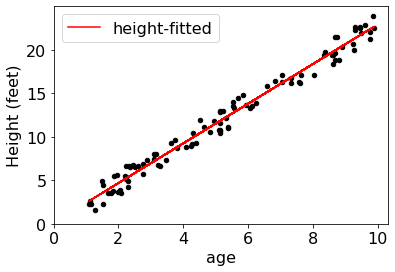

In [32]:
import matplotlib
matplotlib.rcParams["font.size"] = 16

ax = trees.plot.scatter(x="age", y="height", c="black", xlim=0, ylim=0)
ax.set_xlabel("Age (years)")
ax.set_ylabel("Height (feet)")

trees.plot.line(ax=ax, x="age", y="height-fitted", color="red")